# Visualizations for iEMSs 2022

This notebook is used to create visualizations, specifically for the conference.

## Imports

In [1]:
from dmdu.general.visualization import plot_conference_pathways
from matplotlib import pyplot as plt
from model.enumerations import ProblemFormulation
import os
import pandas as pd
from ema_workbench import load_results

## Directory

In [2]:
target_directory = os.path.join(
    os.path.dirname(os.getcwd()),
    'data',
    'experiments_bad',
    # 'experiments_random_reused'
)

## Parameters

In [3]:
problem_formulations = [
    ProblemFormulation.UTILITARIAN_AGGREGATED,
    ProblemFormulation.EGALITARIAN_AGGREGATED
]

problem_formulations_dict = {}

## Load results

In [4]:
for problem_formulation in problem_formulations:

    pf_df = None

    # Define path to load data from
    file = f'results_{problem_formulation.name}'
    path = os.path.join(target_directory, file)

    # Load results
    _, outcomes = load_results(path)
    outcomes = pd.DataFrame(outcomes)

    # Append results
    pf_df = outcomes if pf_df is None else pd.concat([pf_df, outcomes])

    problem_formulations_dict[problem_formulation.name] = pf_df

[]

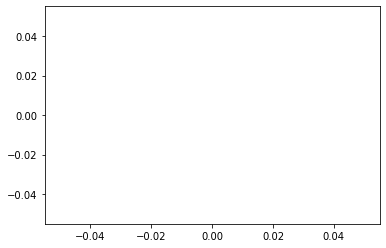

In [5]:
plt.plot()

In [6]:
problem_formulations_dict[ProblemFormulation.UTILITARIAN_AGGREGATED.name]

,Damages 2005,Damages 2015,Damages 2025,Damages 2035,Damages 2045,Damages 2055,Damages 2065,Damages 2075,Damages 2085,Damages 2095,...,Lowest income per capita 2215,Lowest income per capita 2225,Lowest income per capita 2235,Lowest income per capita 2245,Lowest income per capita 2255,Lowest income per capita 2265,Lowest income per capita 2275,Lowest income per capita 2285,Lowest income per capita 2295,Lowest income per capita 2305
0,0.087272,0.245626,0.495766,0.932434,1.618330,2.592775,3.889778,5.555642,7.619654,10.098564,...,7.107990,5.785294,4.272774,2.568287,0.724398,0.010000,0.010000,0.010000,0.010000,0.010000
1,0.087272,0.245626,0.499864,0.945368,1.647486,2.647980,3.983140,5.701787,7.835191,10.401516,...,5.983205,4.502605,2.819995,0.933067,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000
2,0.087272,0.245626,0.558511,1.146795,2.133195,3.620468,5.708054,8.516697,12.277478,17.039305,...,10.414589,9.254555,7.888914,6.313394,4.602347,2.636238,0.425474,0.010000,0.010000,0.010000
3,0.087272,0.245626,0.555905,1.135142,2.097420,3.531905,5.518939,8.152973,11.620193,15.930512,...,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000
4,0.087272,0.245626,0.522607,1.019848,1.820219,2.982617,4.559923,6.619397,9.207707,12.478863,...,22.654968,24.236128,25.877053,27.555881,29.288265,31.028815,32.774142,34.523866,36.278746,38.066899
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,0.087272,0.245626,0.499610,0.945652,1.651077,2.661075,4.016769,5.773500,7.970751,10.636685,...,23.077108,24.700300,26.389473,28.121793,29.912506,31.715640,33.527622,35.347988,37.177504,39.044718
596,0.087272,0.245626,0.526623,1.034593,1.858449,3.065015,4.716993,6.894215,9.657746,13.192815,...,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000
597,0.087272,0.245626,0.520079,1.012464,1.805797,2.960793,4.533927,6.597937,9.207465,12.527206,...,22.401502,23.948549,25.556756,27.203610,28.904010,30.612108,32.324019,34.038961,35.757363,37.505931
598,0.087272,0.245626,0.512280,0.986552,1.744959,2.841616,4.326357,6.264365,8.703549,11.678891,...,22.641158,24.220834,25.863958,27.547769,29.301766,31.061273,32.823048,34.587406,36.355774,38.156276


## Visualization: damages and atmospheric temperature increase

## Visualization: welfare and welfare loss (with color: temperature increase)

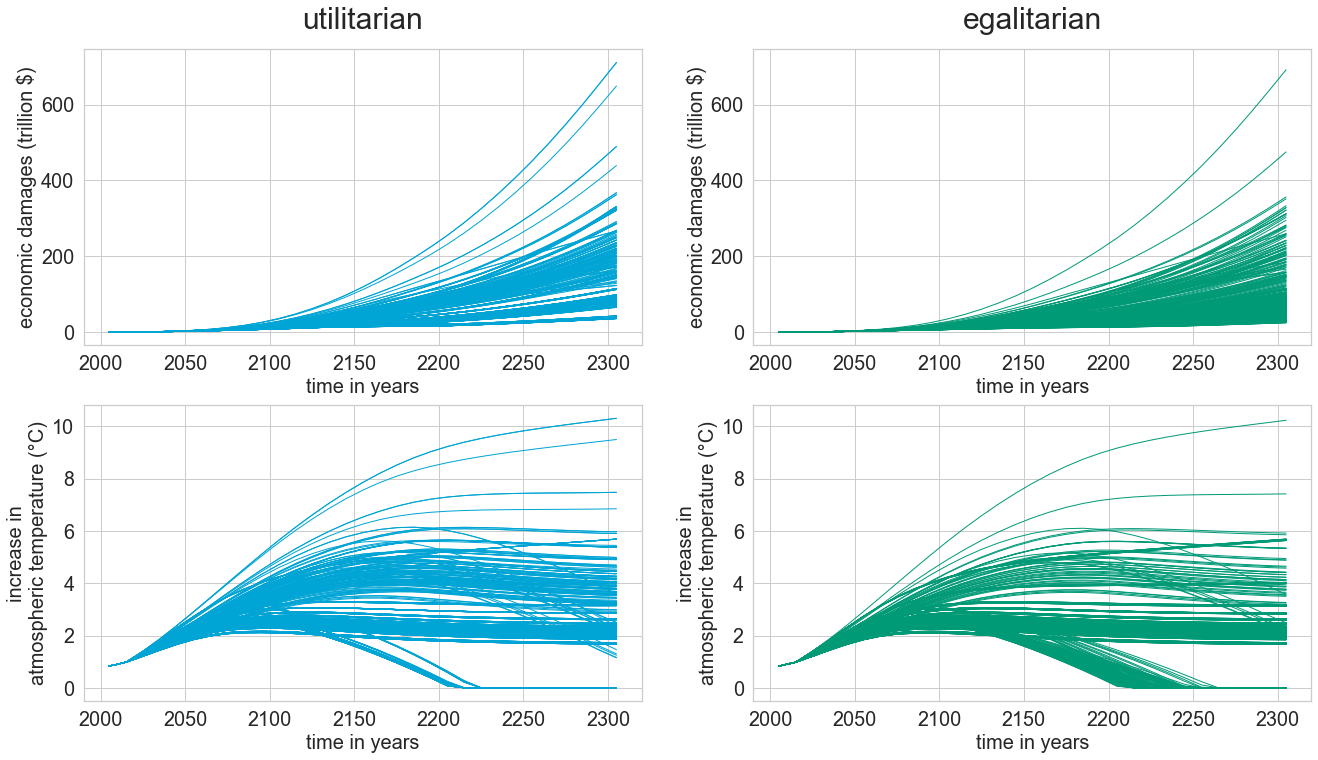

In [7]:
plot_conference_pathways(
    problem_formulations_dict=problem_formulations_dict,
    outcome_names=['Damages', 'Atmospheric Temperature'],
    # shaded_outcome_name='Intratemporal consumption Gini 2305',
    shaded_outcome_name='Intratemporal consumption Gini 2305',
    uni_color=True,
    saving=False,
    file_name=f'iEMSs_pathways_0'
)

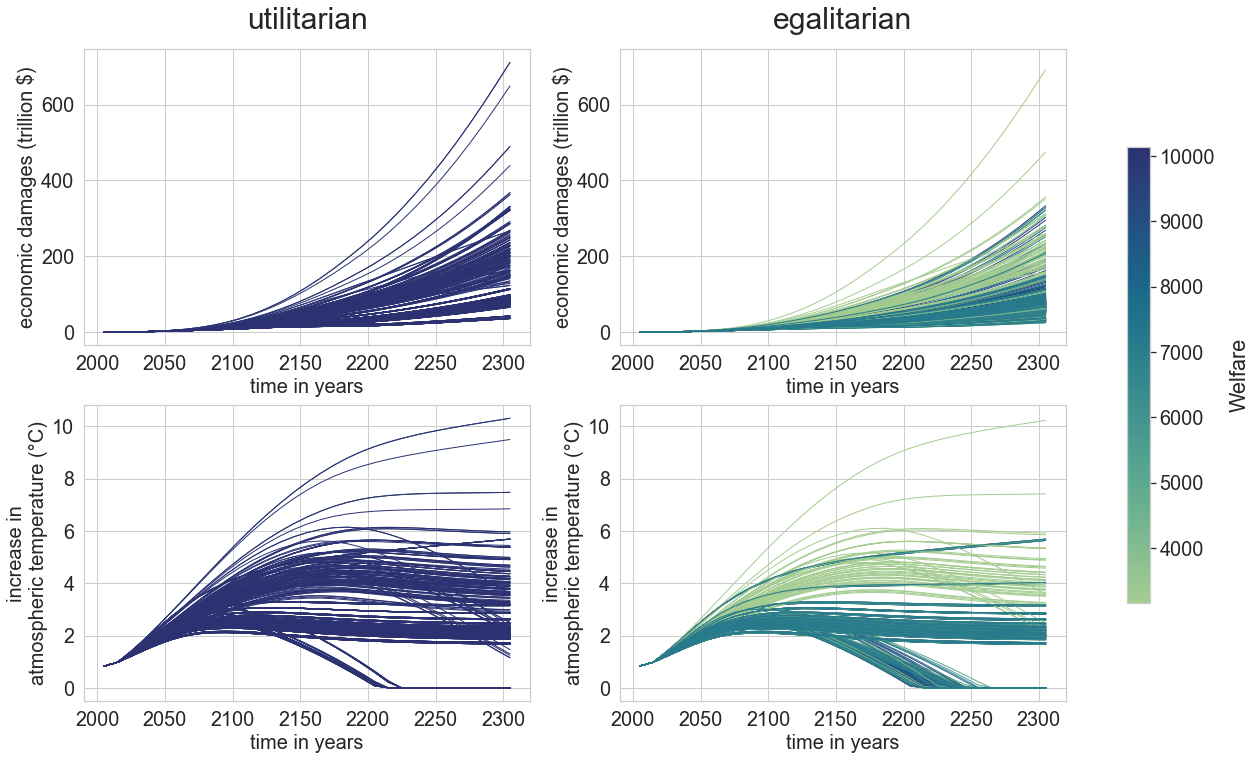

In [10]:
plot_conference_pathways(
    problem_formulations_dict=problem_formulations_dict,
    outcome_names=['Damages', 'Atmospheric Temperature'],
    shaded_outcome_name='Utility 2105',
    uni_color=False,
    saving=True,
    file_name=f'iEMSs_pathways_with_damages_welfare_coded'
)

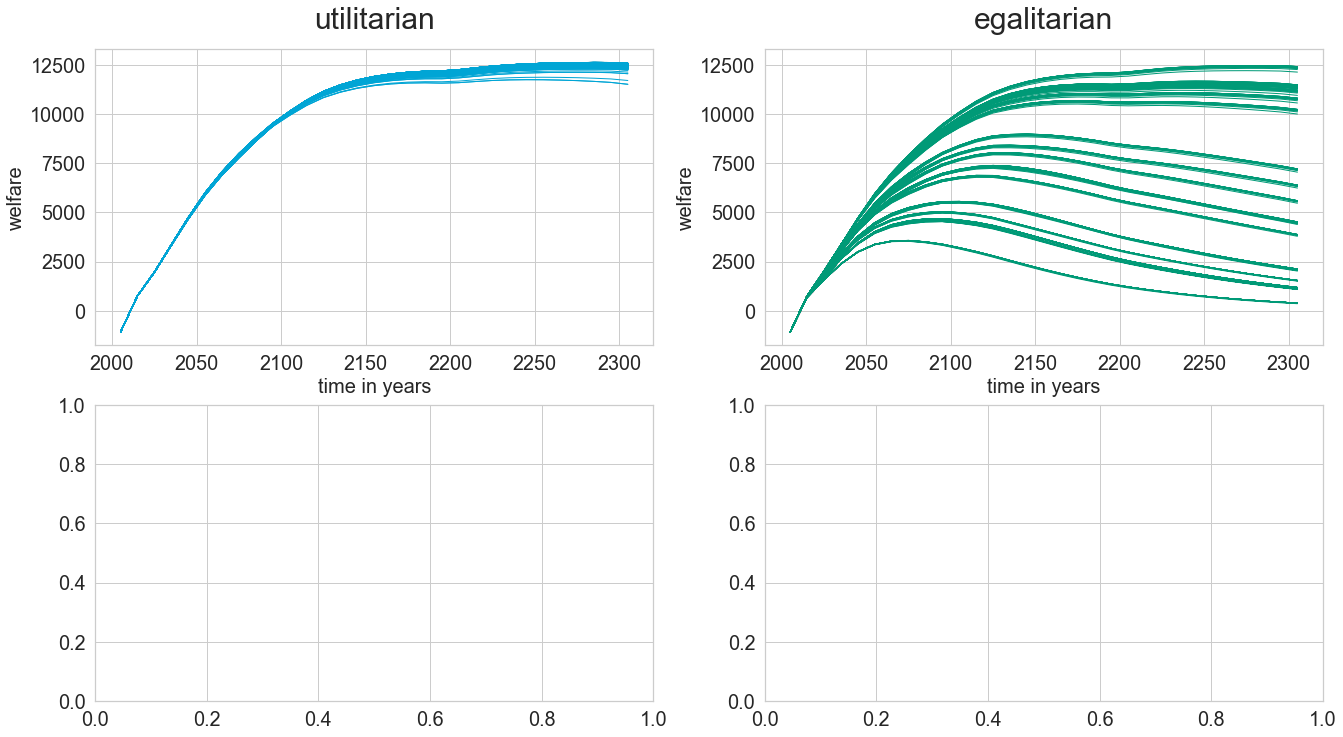

In [11]:
plot_conference_pathways(
    problem_formulations_dict=problem_formulations_dict,
    outcome_names=['Utility'],
    shaded_outcome_name='Intratemporal consumption Gini 2305',
    uni_color=True,
    saving=True,
    file_name=f'iEMSs_pathways_welfare'
)